
# Position changes during a race

Plot the position of each driver at the end of each lap.


In [11]:
import matplotlib.pyplot as plt

import fastf1.plotting


# Load FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False,
                          color_scheme='fastf1')

Load the session and create the plot



core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

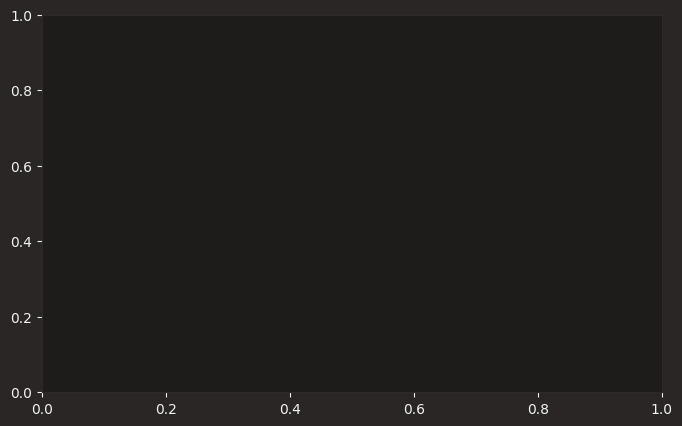

In [12]:
session = fastf1.get_session(2021, 1, 'R')
session.load(telemetry=False, weather=False)

fig, ax = plt.subplots(figsize=(8.0, 4.9))

For each driver, get their three letter abbreviation (e.g. 'HAM') by simply
using the value of the first lap, get their color and then plot their
position over the number of laps.



In [13]:
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    style = fastf1.plotting.get_driver_style(identifier=abb,
                                             style=['color', 'linestyle'],
                                             session=session)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, **style)

req            INFO 	Using cached data for driver_info


Finalize the plot by setting y-limits that invert the y-axis so that position
one is at the top, set custom tick positions and axis labels.



In [14]:
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

Text(4.444444444444452, 0.5, 'Position')

Because this plot is very crowed, add the legend outside the plot area.



In [15]:
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

<Figure size 640x480 with 0 Axes>